Przygotuj mapę na poziomie gmin o liczbie małżeństw na 1000 mieszkańców

https://bdl.stat.gov.pl/bdl/dane/podgrup/temat

Tabelka: P3430 Małżeństwa na 1000 ludności wg lokalizacji

Granice gmin: https://dane.gov.pl/pl/dataset/726,panstwowy-rejestr-granic-i-powierzchni-jednostek-podziaow-terytorialnych-kraju/resource/29515/table

Uwaga: podobnie do powiatów, kody się nie zgadzają, natomiast można zaleść formułę do połączenia danych


In [166]:

import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

In [167]:
# "C:\Users\admin\Desktop\Python\Zastosowanie Pythona\jednostkiMapowanie2\A03_Granice_gmin.shp"
#  granice gmin -- jednostki administracyjne

jed = geopandas.read_file(r'C:\Users\admin\Desktop\Python\Zastosowanie Pythona\jednostkiMapowanie2\A03_Granice_gmin.shp', encoding='utf8')


In [168]:
jed

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,ID_BUFOR_1,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry
0,GMI,8181.0,2477011,Tychy,None,13130,2024-02-22,None,2012-09-26,None,...,0,2225588,0.0,None,0.0,0.0,0.689220,0.010285,27625550700000,"POLYGON ((19.02405 50.16924, 19.02414 50.16903..."
1,GMI,12460.0,2601043,Pacanów,None,13030,2020-09-01,None,2012-09-26,None,...,0,2225594,0.0,None,0.0,0.0,0.811761,0.015745,29101054700000,"POLYGON ((21.04170 50.43357, 21.04217 50.43352..."
2,GMI,10339.0,1216013,Ciężkowice,None,13328,2012-09-26,None,2012-09-26,None,...,0,2225597,0.0,None,0.0,0.0,0.713031,0.012906,85166115100000,"POLYGON ((20.86799 49.81942, 20.86781 49.81919..."
3,GMI,19079.0,1437033,Lubowidz,None,13272,2019-03-08,None,2012-09-26,None,...,0,2225606,0.0,None,0.0,0.0,1.157351,0.025607,13037825500000,"POLYGON ((19.89311 53.21316, 19.89321 53.21305..."
4,GMI,12595.0,2601063,Stopnica,None,13030,2020-09-01,None,2012-09-26,None,...,0,2225613,0.0,None,0.0,0.0,1.089672,0.015945,29101078300000,"MULTIPOLYGON (((21.00944 50.40988, 21.00888 50..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,GMI,7108.0,1603032,Cisek,None,13280,2012-09-26,None,2012-09-26,None,...,0,2226676,0.0,None,0.0,0.0,0.672135,0.008959,53141295800000,"POLYGON ((18.17203 50.32743, 18.17539 50.32594..."
2473,GMI,24098.0,1604043,Wołczyn,None,13281,2012-09-26,None,2012-09-26,None,...,0,2226683,0.0,None,0.0,0.0,1.157421,0.030886,53141303000000,"POLYGON ((18.09443 51.13477, 18.09606 51.13388..."
2474,GMI,9736.0,1605023,Krapkowice,None,13282,2012-09-26,None,2012-09-26,None,...,0,2226685,0.0,None,0.0,0.0,0.952181,0.012328,53141309900000,"POLYGON ((17.94852 50.55169, 17.94876 50.55166..."
2475,GMI,9977.0,0812023,Szlichtyngowa,None,13182,2012-09-26,None,2012-09-26,None,...,0,2226691,0.0,None,0.0,0.0,0.817814,0.012980,41105080100000,"POLYGON ((16.17835 51.79122, 16.17863 51.79121..."


In [169]:
print(jed.shape)
print(jed.columns)
len(jed['JPT_KOD_JE'].unique())

(2477, 35)
Index(['JPT_SJR_KO', 'JPT_POWIER', 'JPT_KOD_JE', 'JPT_NAZWA_', 'JPT_ORGAN_',
       'JPT_JOR_ID', 'WERSJA_OD', 'WERSJA_DO', 'WAZNY_OD', 'WAZNY_DO',
       'JPT_KOD__1', 'JPT_NAZWA1', 'JPT_ORGAN1', 'JPT_WAZNA_', 'ID_BUFORA_',
       'ID_BUFORA1', 'ID_TECHNIC', 'IIP_PRZEST', 'IIP_IDENTY', 'IIP_WERSJA',
       'JPT_KJ_IIP', 'JPT_KJ_I_1', 'JPT_KJ_I_2', 'JPT_OPIS', 'JPT_SPS_KO',
       'ID_BUFOR_1', 'JPT_ID', 'JPT_POWI_1', 'JPT_KJ_I_3', 'JPT_GEOMET',
       'JPT_GEOM_1', 'Shape_Leng', 'Shape_Area', 'REGON', 'geometry'],
      dtype='object')


2477

In [170]:
#  separator + csv z małżęnstwami
# df 
df=pd.read_csv(r'C:\Users\admin\Desktop\Python\Zastosowanie Pythona\jednostkiMapowanie2\LUDN_3430_CTAB_20240502114736.csv', sep=';')
df

,Kod,Nazwa,ogółem;2022;[-],Unnamed: 3
0,0,POLSKA,"4,1",NaN
1,200000,DOLNOŚLĄSKIE,"4,3",NaN
2,201000,Powiat bolesławiecki,"4,4",NaN
3,201011,Bolesławiec (1),"4,2",NaN
4,201022,Bolesławiec (2),"4,0",NaN
...,...,...,...,...
4208,3261011,Koszalin (1),"4,5",NaN
4209,3262000,Powiat m. Szczecin,"4,9",NaN
4210,3262011,Szczecin (1),"4,9",NaN
4211,3263000,Powiat m. Świnoujście,"4,0",NaN


In [171]:
print(len(jed['JPT_KOD_JE'].unique()))
print(len(df['Kod'].unique()))

2477
4213


In [172]:
df=df.rename(columns={"ogółem;2022;[-]":"Małżeństwa na 1000 ludności"})
jed=jed.rename(columns={"JPT_KOD_JE":"Kod"})

In [173]:

df["Kod"]=df["Kod"].map(str)

#przetwarzamy w liczby
df["Małżeństwa na 1000 ludności"]=df["Małżeństwa na 1000 ludności"].str.replace(',','.')
df["Małżeństwa na 1000 ludności"] = pd.to_numeric(df["Małżeństwa na 1000 ludności"], errors='coerce')

In [174]:


# Usuwamy 0 sprzed każego kodu w jed
def correction(row):
    if row["Kod"][0]=="0":
        return row['Kod'][1:]
    else:
        return row['Kod']

jed['Kod']=jed.apply(lambda row: correction(row), axis=1)


# Odejmowanie 1 od  kodów w jed
kody_minus_1=[] 
for i in jed['Kod'].unique():
  if i not in df['Kod'].unique():
    kody_minus_1.append(i)


def minus1(row):
    global kody_minus_1
    if row["Kod"] in kody_minus_1:
        return str(int(row['Kod'])-1)
    else:
        return row['Kod']
    
jed['Kod']=jed.apply(lambda row: minus1(row), axis=1)



In [175]:
df2=jed.merge(df, on='Kod')
df2.shape

(2477, 38)

Text(0.5, 1.0, 'Polska i Małżeństwa na 1000 ludności')

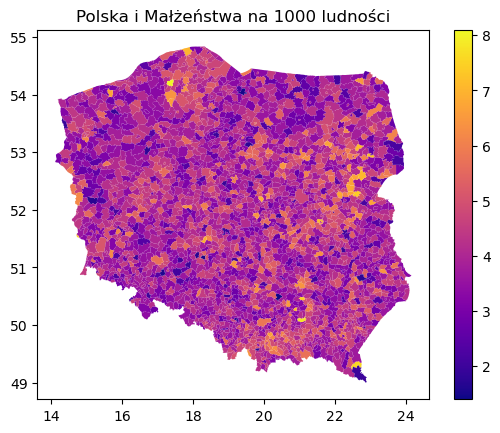

In [176]:
fig, ax = plt.subplots(1, 1)

df2.plot(column='Małżeństwa na 1000 ludności', ax=ax, legend=True, cmap='plasma')
ax.set_title('Polska i Małżeństwa na 1000 ludności')